In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/My Drive/application_data.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(307511, 122)

In [ ]:
df.nunique()

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        25
Length: 122, dtype: int64

In [ ]:
# find bad columns (columns with more than 30% null values)

badcol=df.isnull().sum()
badcol=badcol[badcol.values>(0.3*len(badcol))]
len(badcol)

64

In [ ]:
# drop bad columns
badcol = list(badcol[badcol.values>=0.3].index)
df.drop(labels=badcol,axis=1,inplace=True)
print(len(badcol))

64


In [ ]:
# double check for bad columns
df.isnull().sum()/len(df)*100 > 0.3

SK_ID_CURR                     False
TARGET                         False
NAME_CONTRACT_TYPE             False
CODE_GENDER                    False
FLAG_OWN_CAR                   False
FLAG_OWN_REALTY                False
CNT_CHILDREN                   False
AMT_INCOME_TOTAL               False
AMT_CREDIT                     False
AMT_ANNUITY                    False
NAME_INCOME_TYPE               False
NAME_EDUCATION_TYPE            False
NAME_FAMILY_STATUS             False
NAME_HOUSING_TYPE              False
REGION_POPULATION_RELATIVE     False
DAYS_BIRTH                     False
DAYS_EMPLOYED                  False
DAYS_REGISTRATION              False
DAYS_ID_PUBLISH                False
FLAG_MOBIL                     False
FLAG_EMP_PHONE                 False
FLAG_WORK_PHONE                False
FLAG_CONT_MOBILE               False
FLAG_PHONE                     False
FLAG_EMAIL                     False
CNT_FAM_MEMBERS                False
REGION_RATING_CLIENT           False
R

In [ ]:
# check null value
df.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    12
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
CNT_FAM_MEMBERS                 2
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
WEEKDAY_APPR_PROCESS_START      0
HOUR_APPR_PROC

In [ ]:
df.shape

(307511, 58)

In [ ]:
# drop all rows with null value
df.dropna(axis=0, how='any', inplace=True)

In [ ]:
df.shape

(307496, 58)

In [ ]:
# remove useless columns

no_columns =['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df.drop(labels=no_columns,axis=1,inplace=True)

In [ ]:
df.shape

(307496, 28)

In [ ]:
df.nunique()

SK_ID_CURR                     307496
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         3
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
AMT_ANNUITY                     13672
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  5
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_REGISTRATION               15688
DAYS_ID_PUBLISH                  6168
WEEKDAY_APPR_PROCESS_START          7
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NO

In [ ]:
df['CODE_GENDER'].value_counts()

F      202439
M      105053
XNA         4
Name: CODE_GENDER, dtype: int64

In [ ]:
# Updating the column 'CODE_GENDER' with "F" for the dataset

df.loc[df['CODE_GENDER']=='XNA','CODE_GENDER']='F'
df['CODE_GENDER'].value_counts()

F    202443
M    105053
Name: CODE_GENDER, dtype: int64

In [ ]:
# Drop the rows have 'XNA' values in the organization type column

df=df.drop(df.loc[df['ORGANIZATION_TYPE']=='XNA'].index)
df[df['ORGANIZATION_TYPE']=='XNA'].shape

(0, 28)

In [ ]:
df.shape

(252122, 28)

In [ ]:
new_df1 = df

In [ ]:
new_df1.shape

(252122, 28)

In [ ]:
column_names = new_df1.columns.tolist()

print(column_names)

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE']


In [ ]:
features = new_df1.drop('TARGET', axis=1).columns.tolist()
print(features)

target = 'TARGET'

['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE']


In [ ]:
data_types = new_df1.dtypes

print(data_types)

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGION       int64
LIVE_REGION_NOT_WORK_REGION      int64
REG_CITY_NOT_LIVE_CITY           int64
REG_CITY_NOT_WORK_CITY   

In [ ]:
numerical_cols = new_df1.select_dtypes(include=['int64', 'float64']).columns.tolist()
descriptive_cols = new_df1.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Descriptive columns:", descriptive_cols)

Numerical columns: ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']
Descriptive columns: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


In [ ]:
application_counts = new_df1[target].value_counts()

approval_percentage = application_counts[1] / application_counts.sum() * 100
rejection_percentage = application_counts[0] / application_counts.sum() * 100

print(f"Percentage of Approvals: {approval_percentage:.2f}%")
print(f"Percentage of Rejections: {rejection_percentage:.2f}%")

Percentage of Approvals: 8.66%
Percentage of Rejections: 91.34%


In [ ]:
approved_raw = new_df1[new_df1[target] == 1]
rejected_raw = new_df1[new_df1[target] == 0]

percentage = len(approved_raw) / float(len(rejected_raw))

rejected = rejected_raw.sample(frac=percentage, random_state=1)

new_df2 = approved_raw.append(rejected)

application_counts = new_df2[target].value_counts()
approval_percentage = application_counts[0] / application_counts.sum() * 100
rejection_percentage = application_counts[1] / application_counts.sum() * 100

print(f"Percentage of Approvals: {approval_percentage:.2f}%")
print(f"Percentage of Rejections: {rejection_percentage:.2f}%")

Percentage of Approvals: 50.00%
Percentage of Rejections: 50.00%


<ipython-input-29-a85f49326c9b>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df2 = approved_raw.append(rejected)


In [ ]:
new_df2.shape

(43670, 28)

In [ ]:
unique_values = new_df2[descriptive_cols].nunique()

print(unique_values)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_INCOME_TYPE               6
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             57
dtype: int64


In [ ]:
new_df3 = pd.get_dummies(new_df2)
new_df3.shape

(43670, 112)

In [ ]:
from sklearn.model_selection import train_test_split
train_validate, test = train_test_split(new_df3, test_size=0.1, random_state=0)

train, validate = train_test_split(train_validate, test_size=0.2, random_state=0)

print(f"Number of instances in the training set: {len(train)}")
print(f"Number of instances in the validation set: {len(validate)}")
print(f"Number of instances in the test set: {len(test)}")


Number of instances in the training set: 31442
Number of instances in the validation set: 7861
Number of instances in the test set: 4367


In [ ]:
features = new_df3.drop('TARGET', axis=1).columns.tolist()
print(features)

target = 'TARGET'

['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'NAME_CONTRACT_TYPE_Cash loans', 'NAME_CONTRACT_TYPE_Revolving loans', 'CODE_GENDER_F', 'CODE_GENDER_M', 'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_N', 'FLAG_OWN_REALTY_Y', 'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Maternity leave', 'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree', 'NAME_EDUCATION_TYPE_Higher education', 'NAME_EDUCATION_TYPE_Incomplete higher', 'NAME_EDUCATION_TYPE_Lower secondary', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'NAME_FAMILY_STATUS_Civil marr

In [ ]:
features = train.drop(target, axis=1).columns
X_train = train[features]
y_train = train[target]
X_validate = validate[features]
y_validate = validate[target]
X_test = test[features]
y_test = test[target]


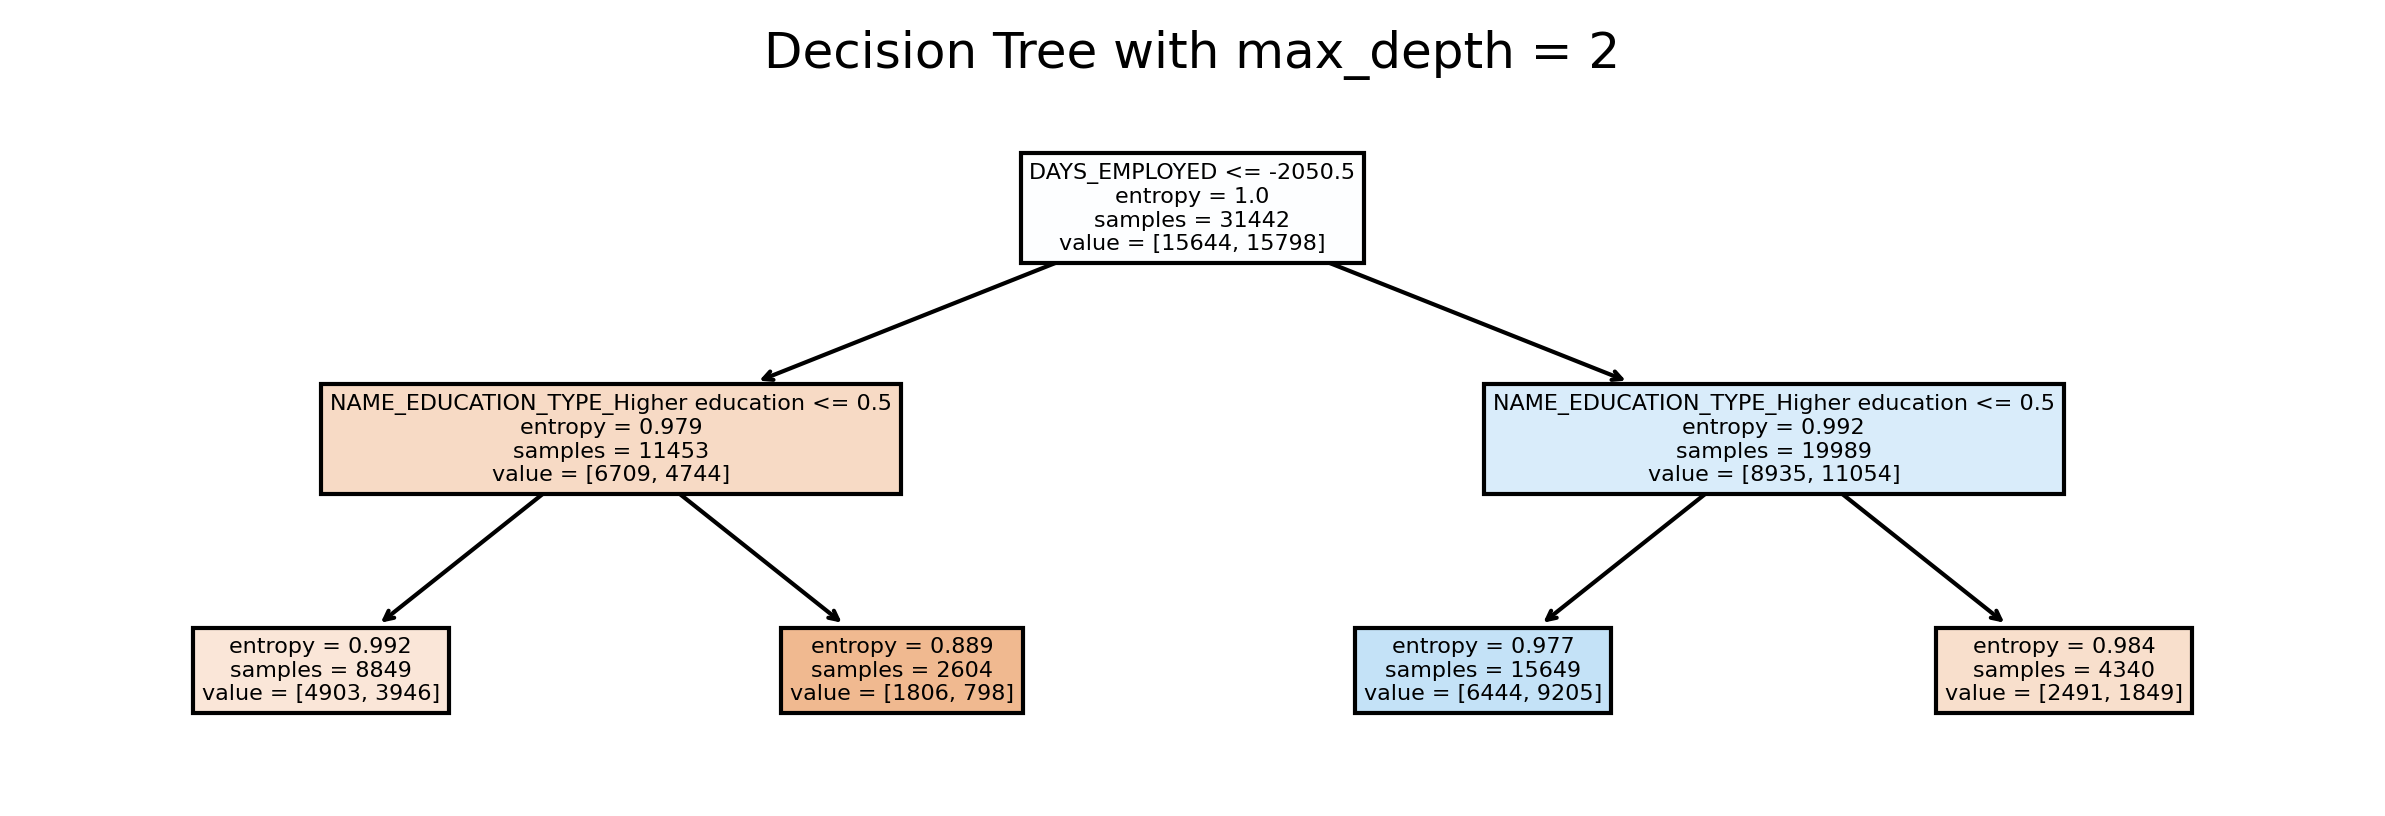

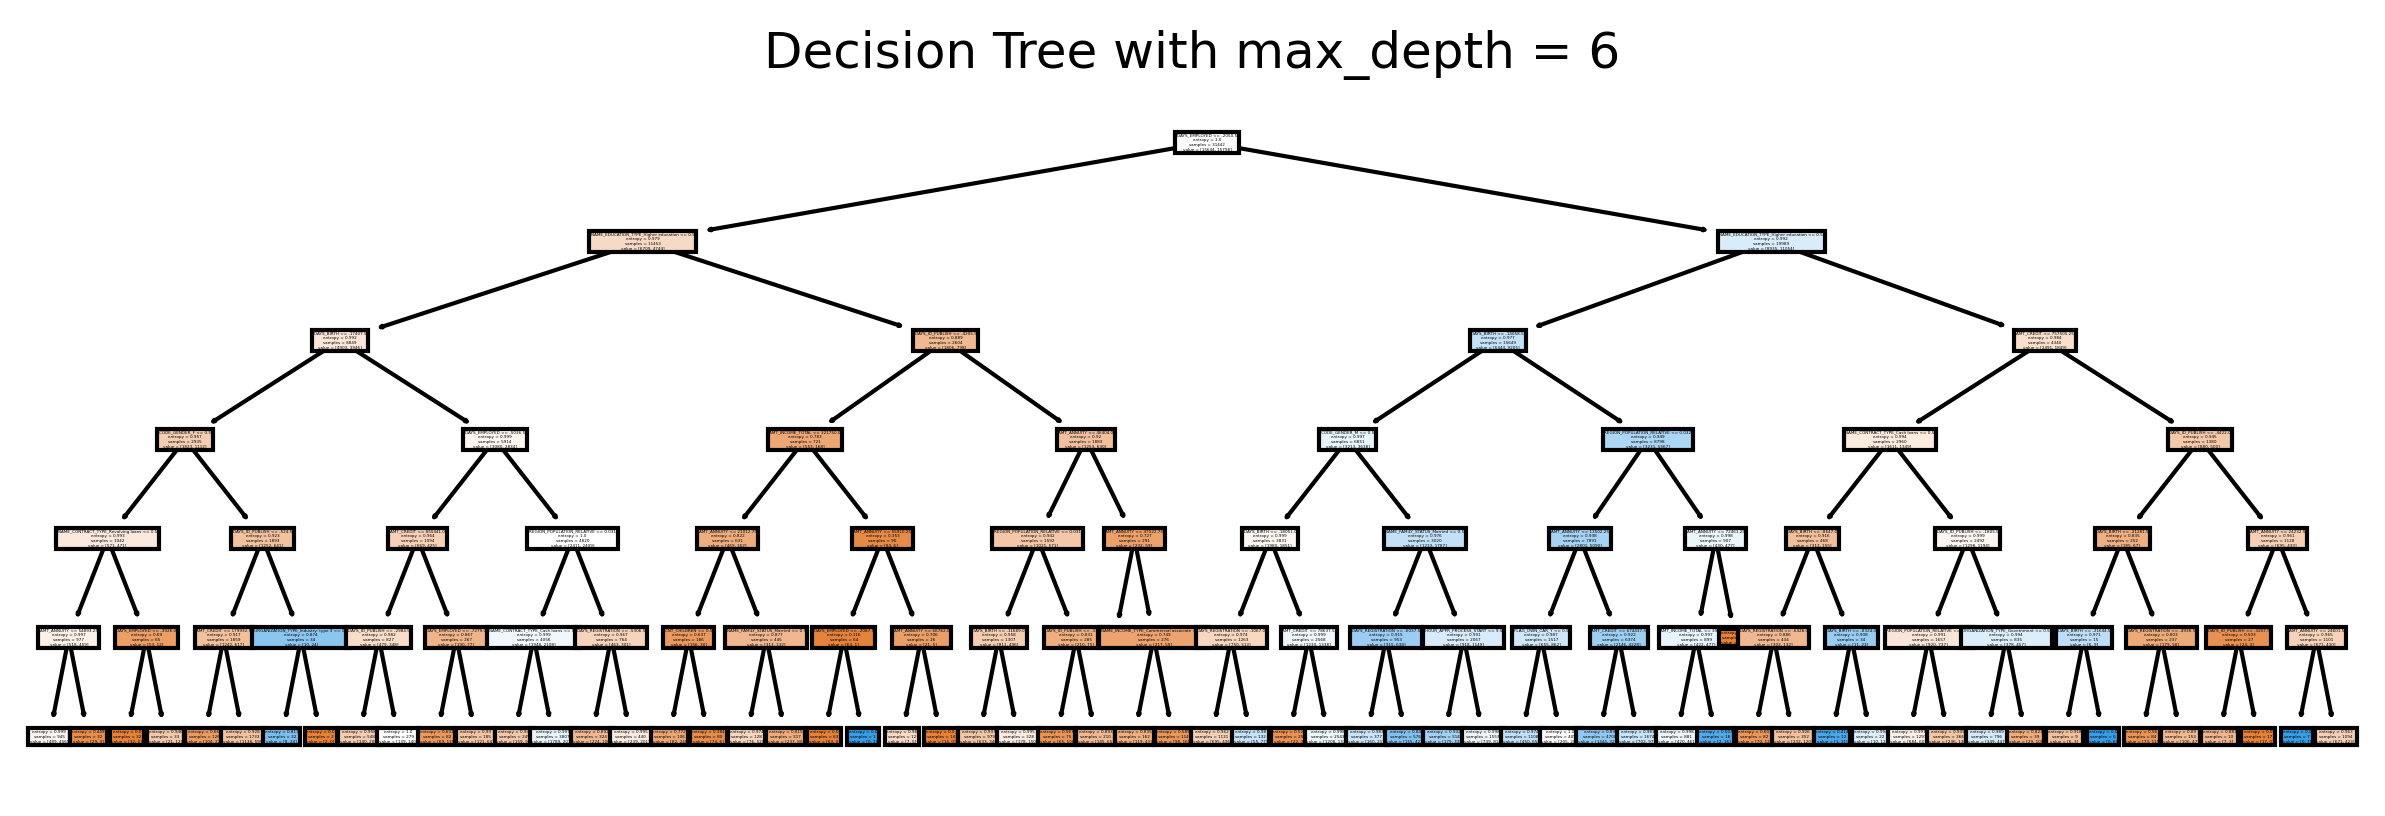

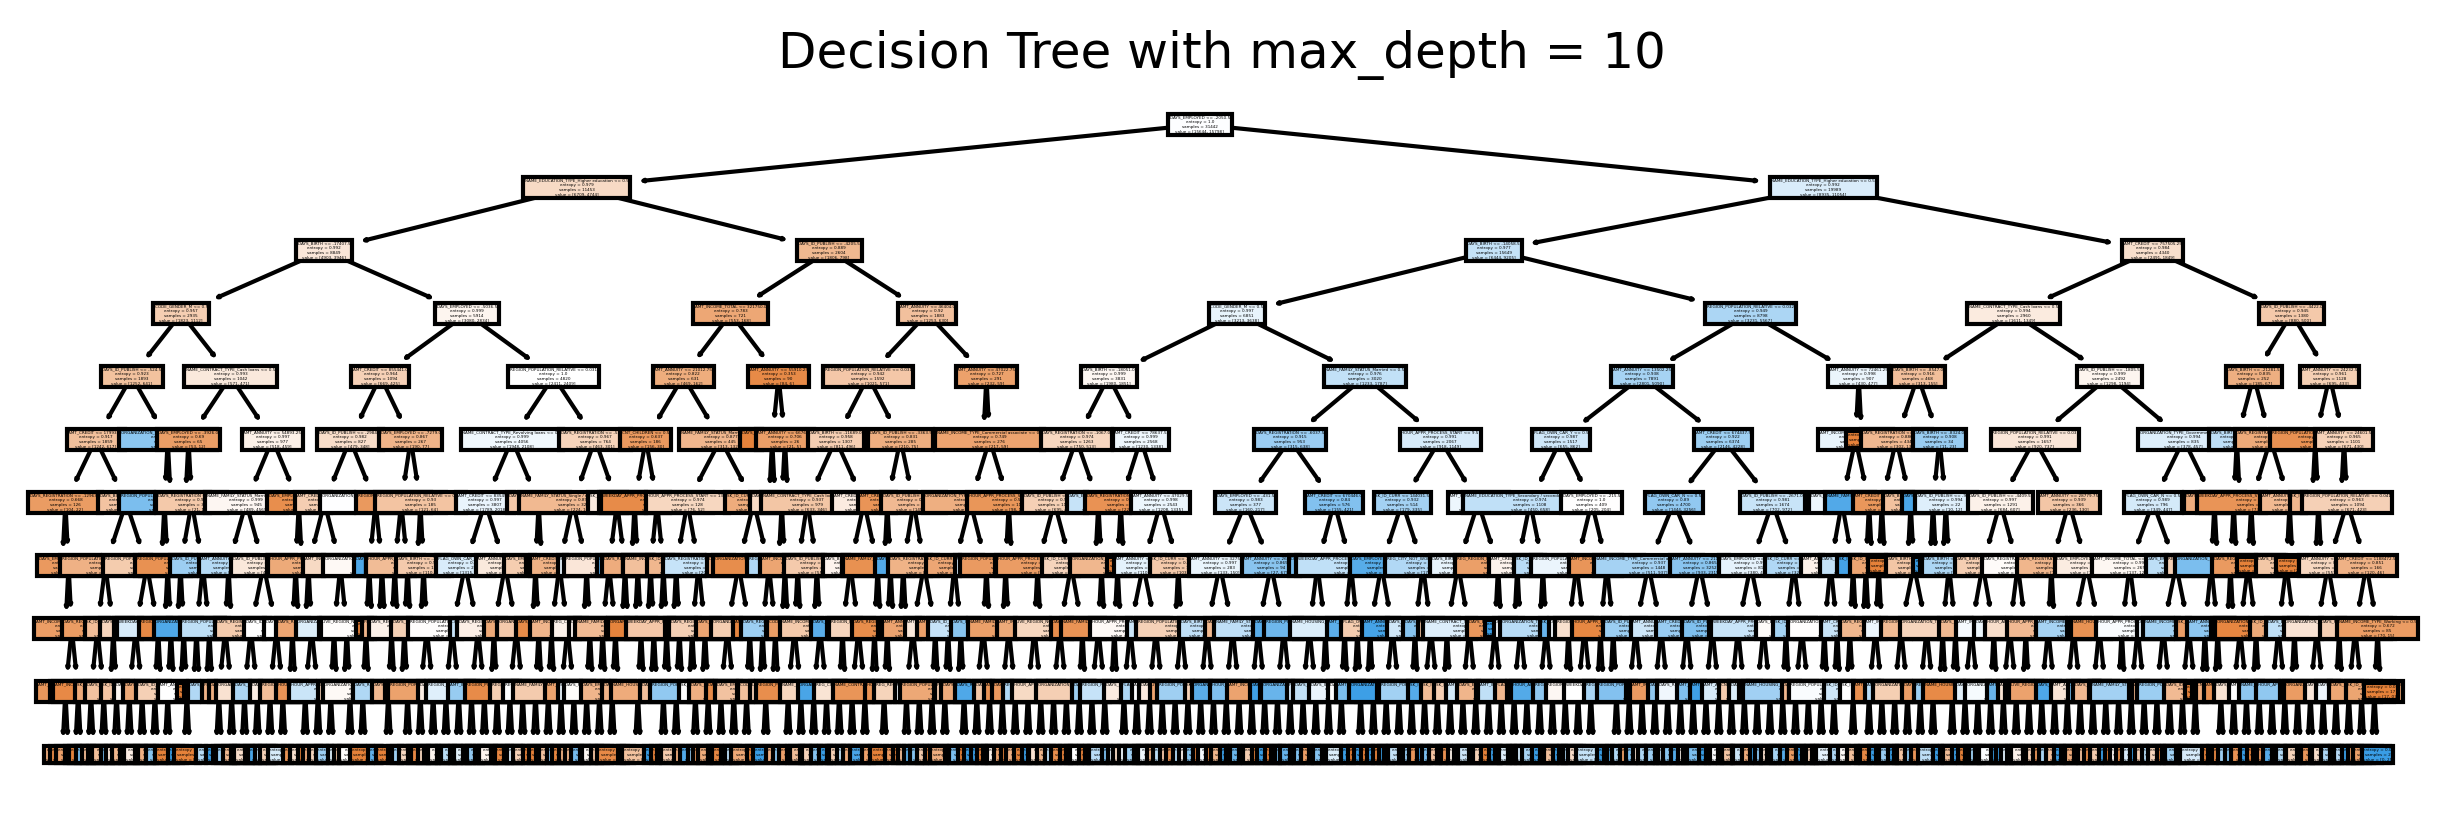

Accuracy of Decision Tree Classifier with max_depth = 2: 0.5843
Accuracy of Decision Tree Classifier with max_depth = 6: 0.5802
Accuracy of Decision Tree Classifier with max_depth = 10: 0.5844


In [ ]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

features = train.drop(target, axis=1).columns
X_train = train[features]
y_train = train[target]
X_validate = validate[features]
y_validate = validate[target]
X_test = test[features]
y_test = test[target]

depths = [2, 6, 10]
models = []
for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, criterion='entropy')
    tree.fit(X_train, y_train)

    plt.figure(figsize=(10, 3), dpi=300)
    tree_dot = plot_tree(tree, feature_names=features, filled=True)
    plt.title(f"Decision Tree with max_depth = {depth}")
    plt.show()

    models.append(tree)

accuracies = []
for model in models:
    predictions = model.predict(X_validate)
    accuracy = accuracy_score(y_validate, predictions)
    accuracies.append(accuracy)

for depth, accuracy in zip(depths, accuracies):
    print(f"Accuracy of Decision Tree Classifier with max_depth = {depth}: {accuracy:.4f}")

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

best_model_index = accuracies.index(max(accuracies))
best_model = models[best_model_index]

y_pred = best_model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Precision: 0.586411889596603
Recall: 0.627442071785552
F1 Score: 0.6062335381913959
ROC AUC: 0.5888826240737548


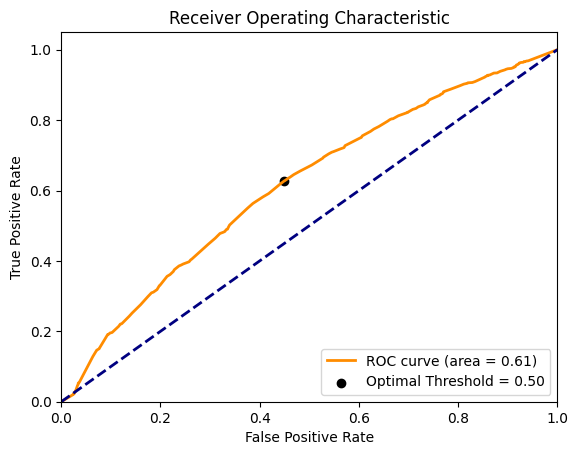

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = best_model.predict_proba(X_test)[::,1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label='Optimal Threshold = %0.2f' % optimal_threshold)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#k-NN Model

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

best_accuracy = 0
best_knn = None
best_y_pred = None
best_n = None

for n in [3, 4, 5]:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_knn = knn
        best_y_pred = knn.predict(X_test)
        best_n = n

print(f"Best Model is with n = {best_n}")
print(f"Test Accuracy of Best Model: {best_accuracy:.4f}")

# Calculate precision, recall, F1 score, and ROC AUC for the best model
precision = precision_score(y_test, best_y_pred)
recall = recall_score(y_test, best_y_pred)
f1 = f1_score(y_test, best_y_pred)
roc_auc = roc_auc_score(y_test, best_y_pred)

# Print the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Best Model is with n = 5
Test Accuracy of Best Model: 0.5274
Precision: 0.5301895107977083
Recall: 0.546569741026806
F1 Score: 0.538255033557047
ROC AUC: 0.5272091549086015


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

best_accuracy = 0
best_knn = None
best_y_pred = None
best_n = None

for n in [6, 7, 8]:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_knn = knn
        best_y_pred = knn.predict(X_test)
        best_n = n

print(f"Best Model is with n = {best_n}")
print(f"Test Accuracy of Best Model: {best_accuracy:.4f}")

# Calculate precision, recall, F1 score, and ROC AUC for the best model
precision = precision_score(y_test, best_y_pred)
recall = recall_score(y_test, best_y_pred)
f1 = f1_score(y_test, best_y_pred)
roc_auc = roc_auc_score(y_test, best_y_pred)

# Print the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Best Model is with n = 6
Test Accuracy of Best Model: 0.5281
Precision: 0.5424242424242425
Recall: 0.40663334847796456
F1 Score: 0.4648143339392366
ROC AUC: 0.5290322790404596


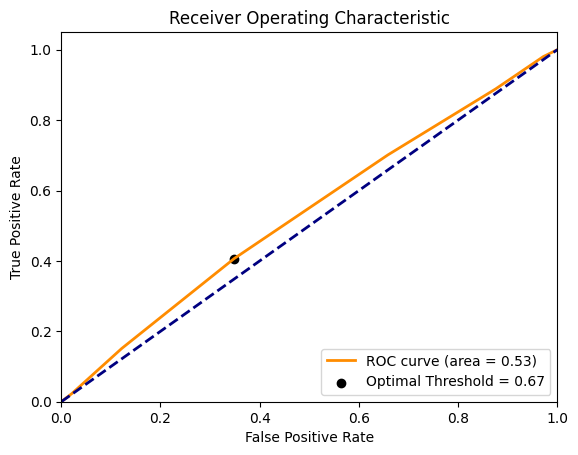

In [ ]:
from sklearn.metrics import roc_curve, auc
import numpy as np

# Compute predicted probabilities with the `predict_proba` function
y_pred_proba = best_knn.predict_proba(X_test)[::,1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Compute the optimal threshold index
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label='Optimal Threshold = %0.2f' % optimal_threshold)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

lc = LogisticRegression(max_iter=1000)

lc.fit(X_train, y_train)


accuracy = knn.score(X_test, y_test)
print(f"Test Accuracy of Best Model: {accuracy:.4f}")

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

y_pred = lc.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Test Accuracy of Best Model: 0.5184
Precision: 0.573700042973786
Recall: 0.6065424806905951
F1 Score: 0.5896643109540637
ROC AUC: 0.5742777038725366


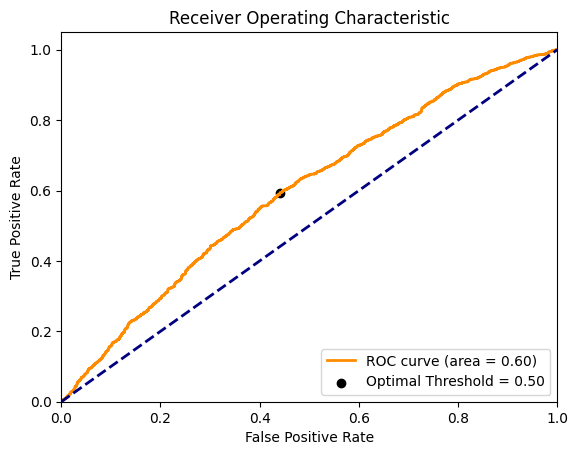

In [ ]:
from sklearn.metrics import roc_curve, auc
import numpy as np

y_pred_proba = lc.predict_proba(X_test)[::,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label='Optimal Threshold = %0.2f' % optimal_threshold)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

param_grid = {'max_features': [2, 4, 6, 8, 10], 'max_depth': [6, 8, 10, 12, 14]}

rf = RandomForestClassifier()

gridf = GridSearchCV(rf, param_grid=param_grid, cv=5, return_train_score=True)
gridf.fit(X_train, y_train)

print(f"Best Hyperparameters: {gridf.best_params_}")

accuracy = gridf.score(X_test, y_test)
print(f"Test Accuracy of Best Model: {accuracy:.4f}")

Best Hyperparameters: {'max_depth': 10, 'max_features': 8}
Test Accuracy of Best Model: 0.6103


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

y_pred = gridf.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Precision: 0.6161347517730497
Recall: 0.631531122217174
F1 Score: 0.6237379403185999
ROC AUC: 0.6158578972120035


In [ ]:
# SVM Classifier

import numpy as np
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt

scaled_svc = make_pipeline(StandardScaler(), SVC(probability=True))

param_grid = {'svc__C': np.logspace(-2, 2, 3), 'svc__gamma': np.logspace(-2, 2, 3) / X_train.shape[0]}

grids = GridSearchCV(scaled_svc, param_grid=param_grid, cv=5, return_train_score=True)
grids.fit(X_train, y_train)

In [2]:
print(f"Best Hyperparameters: {grids.best_params_}")

accuracy = grids.score(X_test, y_test)
print(f"Test Accuracy of Best Model: {accuracy:.4f}")

from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = grids.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Best Hyperparameters: {'svc__C': 100.0, 'svc__gamma': 0.018501387604070305}
Test Accuracy of Best Model: 0.6038
Precision: 0.622121717311224
Recall: 0.553131859379409
F1 Score: 0.590931859379409
ROC AUC: 0.607237940931859


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

param_grid = {'max_features': [2, 4, 6, 8, 10], 'max_depth': [6, 8, 10, 12, 14]}

rf = RandomForestClassifier()

gridf = GridSearchCV(rf, param_grid=param_grid, cv=5, return_train_score=True)
gridf.fit(X_train, y_train)

print(f"Best Hyperparameters: {gridf.best_params_}")

accuracy = gridf.score(X_test, y_test)
print(f"Test Accuracy of Best Model: {accuracy:.4f}")


y_pred = gridf.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

y_pred = gridf.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Precision: 0.6161347517730497
Recall: 0.631531122217174
F1 Score: 0.6237379403185999
ROC AUC: 0.6158578972120035


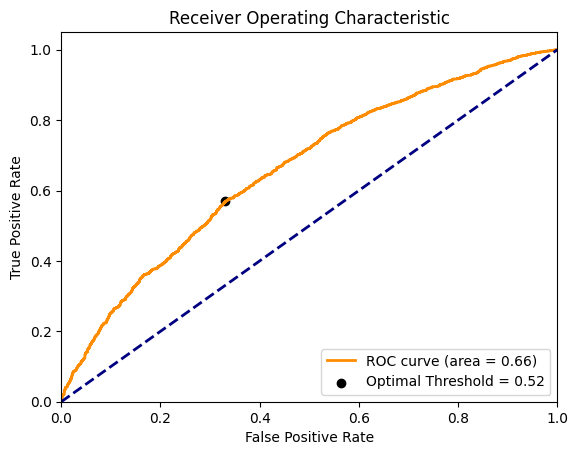

In [ ]:
from sklearn.metrics import roc_curve, auc
import numpy as np

y_pred_proba = gridf.predict_proba(X_test)[::,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label='Optimal Threshold = %0.2f' % optimal_threshold)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Gradient Booster Classifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

param_grid = {'learning_rate': np.logspace(-2, 0, 3),
              'n_estimators': [50, 100, 200]}

gbrt = GradientBoostingClassifier(max_depth=6)

gridg = GridSearchCV(gbrt, param_grid=param_grid, cv=5, return_train_score=True)
gridg.fit(X_train, y_train)

print(f"Best Hyperparameters: {gridg.best_params_}")

accuracy = gridg.score(X_test, y_test)
print(f"Test Accuracy of Best Model: {accuracy:.4f}")

# Predict the labels for the test set
y_pred = gridg.predict(X_test)

# Calculate precision, recall, F1 score, and ROC AUC
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 200}
Test Accuracy of Best Model: 0.6240
Precision: 0.6258442143178748
Recall: 0.631531122217174
F1 Score: 0.6286748077792853
ROC AUC: 0.6239373062609416


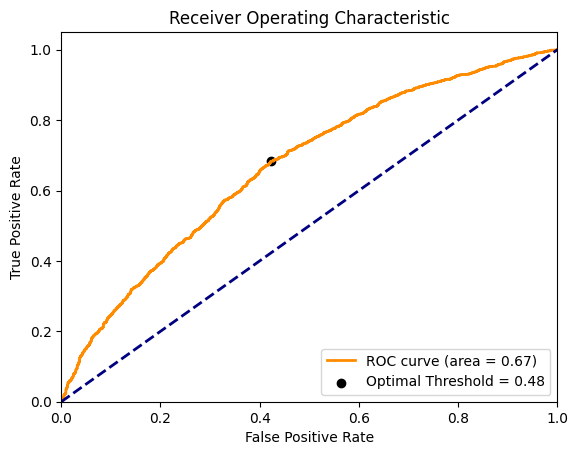

In [ ]:
y_pred_proba = gridg.predict_proba(X_test)[::,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label='Optimal Threshold = %0.2f' % optimal_threshold)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# XG Booster

from xgboost import XGBClassifier

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(tree_method='gpu_hist')
xgb.fit(X_train, y_train)
train_accuracy = xgb.score(X_train, y_train)
test_accuracy = xgb.score(X_test, y_test)
print(f"XGBoost - Accuracy on test set: {test_accuracy:.4f}")

y_pred = xgb.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [21:28:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [21:28:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy on test set: 0.6121
Precision: 0.6134228187919463
Recall: 0.6228986824170831
F1 Score: 0.6181244364292156
ROC AUC: 0.6120033578290403


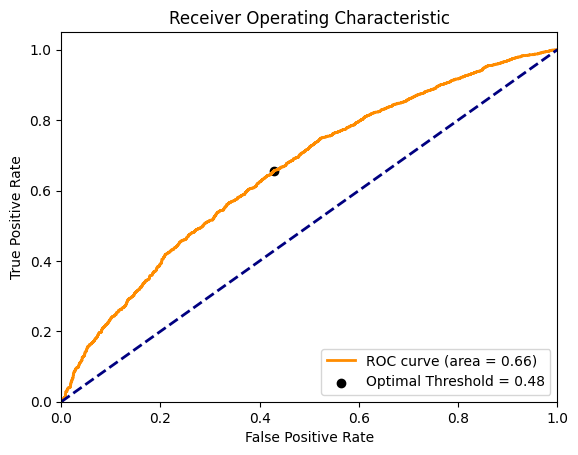

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = xgb.predict_proba(X_test)[::,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label='Optimal Threshold = %0.2f' % optimal_threshold)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# LightGBM

# Clean the column names in your data
def clean_column_names(df):
    df.columns = df.columns.str.replace('[^\w\s]', '')
    df.columns = df.columns.str.replace('\s+', '_')
    df.columns = df.columns.str.strip()
    df.columns = df.columns.str.lower()
    return df


X_train2 = clean_column_names(X_train)
X_test2 = clean_column_names(X_test)


from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(X_train2, y_train)
train_accuracy = lgbm.score(X_train2, y_train)
test_accuracy = lgbm.score(X_test2, y_test)
print(f"LightGBM - Accuracy on test set: {test_accuracy:.4f}")

y_pred = lgbm.predict(X_test2)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

[LightGBM] [Info] Number of positive: 15798, number of negative: 15644
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2243
[LightGBM] [Info] Number of data points in the train set: 31442, number of used features: 99
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502449 -> initscore=0.009796
[LightGBM] [Info] Start training from score 0.009796
LightGBM - Accuracy on test set: 0.6279
Precision: 0.6309090909090909
Recall: 0.6306224443434802
F1 Score: 0.6307657350602135
ROC AUC: 0.6278689322363755


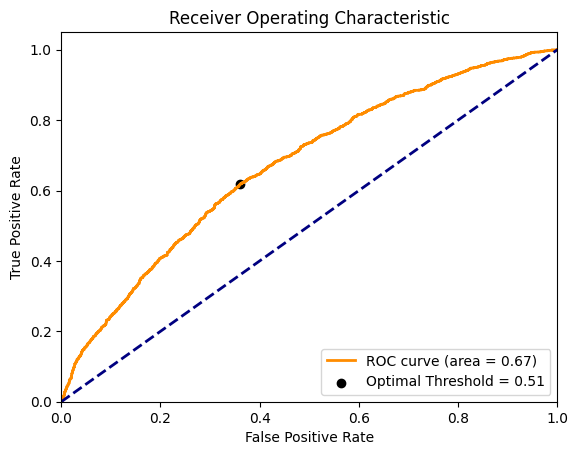

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = lgbm.predict_proba(X_test)[::,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label='Optimal Threshold = %0.2f' % optimal_threshold)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# CatBoost

from catboost import CatBoostClassifier

catb = CatBoostClassifier(task_type='GPU')
catb.fit(X_train, y_train)
train_accuracy = catb.score(X_train, y_train)
test_accuracy = catb.score(X_test, y_test)
print(f"CatBoost - Accuracy on test set: {test_accuracy:.4f}")

y_pred = catb.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Learning rate set to 0.027888
0:	learn: 0.6914657	total: 91ms	remaining: 1m 30s
1:	learn: 0.6898402	total: 178ms	remaining: 1m 28s
2:	learn: 0.6884590	total: 286ms	remaining: 1m 34s
3:	learn: 0.6870824	total: 398ms	remaining: 1m 39s
4:	learn: 0.6857801	total: 500ms	remaining: 1m 39s
5:	learn: 0.6845157	total: 535ms	remaining: 1m 28s
6:	learn: 0.6833663	total: 575ms	remaining: 1m 21s
7:	learn: 0.6821257	total: 613ms	remaining: 1m 16s
8:	learn: 0.6811742	total: 653ms	remaining: 1m 11s
9:	learn: 0.6801580	total: 691ms	remaining: 1m 8s
10:	learn: 0.6792923	total: 724ms	remaining: 1m 5s
11:	learn: 0.6784000	total: 772ms	remaining: 1m 3s
12:	learn: 0.6774788	total: 818ms	remaining: 1m 2s
13:	learn: 0.6766198	total: 860ms	remaining: 1m
14:	learn: 0.6757996	total: 892ms	remaining: 58.6s
15:	learn: 0.6750113	total: 928ms	remaining: 57.1s
16:	learn: 0.6742303	total: 992ms	remaining: 57.4s
17:	learn: 0.6734578	total: 1.09s	remaining: 59.7s
18:	learn: 0.6726957	total: 1.2s	remaining: 1m 1s
19:	lea

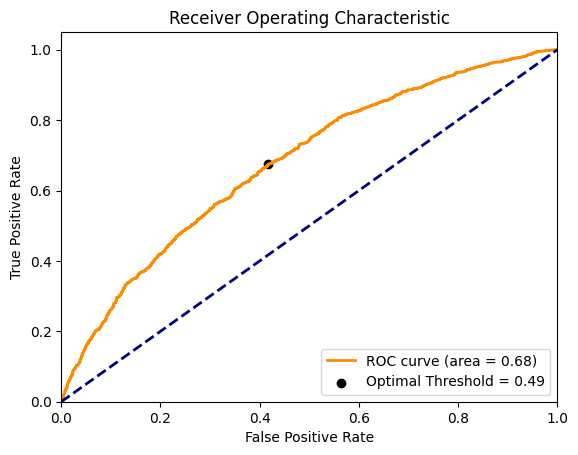

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = catb.predict_proba(X_test)[::,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label='Optimal Threshold = %0.2f' % optimal_threshold)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()